# Webscraping project

For this project ,I am scraping video title,description and link from a given website

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [4]:
source=requests.get('https://coreyms.com').text
soup=BeautifulSoup(source,'lxml')

In [8]:
article=soup.find('article')  # headline
headline=article.h2.a.text
print(headline)

Python Tutorial: Zip Files – Creating and Extracting Zip Archives


In [9]:
# summary tag
summary=soup.find('div',class_='entry-content').p.text
summary

'In this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…'

In [16]:
#print(article.prettify())
vid_id=soup.find('iframe',class_='youtube-player')['src'].split('/')[-1].split('?')[0]
print(vid_id)

z0gguhEmWiY


In [18]:
#creating video link
vid_link= f' https://youtube.com/watch?v={vid_id}'
print(vid_link)

 https://youtube.com/watch?v=z0gguhEmWiY


In [26]:
# for all  video in website
import csv
csv_file=open('web_scraping.csv','w')
csv_writer=csv.writer(csv_file)
csv_writer.writerow(['headline','summary','vid_link'])
for article in soup.find_all('article'):  
    headline=article.h2.a.text
    print(headline)
    summary=soup.find('div',class_='entry-content').p.text
    print(summary)
    vid_id=soup.find('iframe',class_='youtube-player')['src'].split('/')[-1].split('?')[0]
    vid_link= f' https://youtube.com/watch?v={vid_id}'
    print(vid_link)
    print('*'*120)
    csv_writer.writerow([headline,summary,vid_link])
csv_file.close()    

Python Tutorial: Zip Files – Creating and Extracting Zip Archives
In this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…
 https://youtube.com/watch?v=z0gguhEmWiY
************************************************************************************************************************
Python Data Science Tutorial: Analyzing the 2019 Stack Overflow Developer Survey
In this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…
 https://youtube.com/watch?v=z0gguhEmWiY
************************************

In [28]:
import pandas as pd
df=pd.read_csv('web_scraping.csv')
df

,headline,summary,vid_link
0,Python Tutorial: Zip Files � Creating and Extr...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
1,Python Data Science Tutorial: Analyzing the 20...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
2,Python Multiprocessing Tutorial: Run Code in P...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
3,Python Threading Tutorial: Run Code Concurrent...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
4,Update (2019-09-03),"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
5,Python Quick Tip: The Difference Between �==� ...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
6,Python Tutorial: Calling External Commands Usi...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
7,Visual Studio Code (Windows) � Setting up a Py...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
8,Visual Studio Code (Mac) � Setting up a Python...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY
9,Clarifying the Issues with Mutable Default Arg...,"In this video, we will be learning how to crea...",https://youtube.com/watch?v=z0gguhEmWiY


# Scraping Book price from website

In [3]:
source='https://books.toscrape.com'

In [4]:
response=requests.get(source)

In [5]:
response.status_code

200

In [ ]:
soup=BeautifulSoup(response.content,'html.parser')  # creating soup object

In [9]:
result=soup.find_all('li',class_='col-xs-6')

In [11]:
len(result)   # checking total item since it returns list

20

In [15]:
result[0].find('h3').text

'A Light in the ...'

In [19]:
result[0].find('h3').find('a').get('title')  # book title

'A Light in the Attic'

In [22]:
result[0].find('p',class_='price_color').text# book price

'£51.77'

In [27]:
result[0].find('p',class_="instock availability").text.strip()  # book availability

'In stock'

In [29]:
for item in range(len(result)):
    title=result[item].find('h3').find('a').get('title')
    print(title)
    price=result[item].find('p',class_='price_color').text
    print(price)
    availability=result[item].find('p',class_="instock availability").text.strip()
    print(availability)
    print('*'*120)
    

A Light in the Attic
£51.77
In stock
************************************************************************************************************************
Tipping the Velvet
£53.74
In stock
************************************************************************************************************************
Soumission
£50.10
In stock
************************************************************************************************************************
Sharp Objects
£47.82
In stock
************************************************************************************************************************
Sapiens: A Brief History of Humankind
£54.23
In stock
************************************************************************************************************************
The Requiem Red
£22.65
In stock
************************************************************************************************************************
The Dirty Little Secrets of Getting Your Dream Job
£33.34
I

In [31]:
results=soup.find_all('li',class_='col-xs-6')
book_name=[result.find('h3').find('a').get('title') for result in results]
book_name # using list comprehension to get names

['A Light in the Attic',
 'Tipping the Velvet',
 'Soumission',
 'Sharp Objects',
 'Sapiens: A Brief History of Humankind',
 'The Requiem Red',
 'The Dirty Little Secrets of Getting Your Dream Job',
 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
 'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
 'The Black Maria',
 'Starving Hearts (Triangular Trade Trilogy, #1)',
 "Shakespeare's Sonnets",
 'Set Me Free',
 "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
 'Rip it Up and Start Again',
 'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
 'Olio',
 'Mesaerion: The Best Science Fiction Stories 1800-1849',
 'Libertarianism for Beginners',
 "It's Only the Himalayas"]

In [32]:
book_price=[result.find('p',class_='price_color').text for result in results]
book_price

['£51.77',
 '£53.74',
 '£50.10',
 '£47.82',
 '£54.23',
 '£22.65',
 '£33.34',
 '£17.93',
 '£22.60',
 '£52.15',
 '£13.99',
 '£20.66',
 '£17.46',
 '£52.29',
 '£35.02',
 '£57.25',
 '£23.88',
 '£37.59',
 '£51.33',
 '£45.17']

In [33]:
stock_availability=[result.find('p',class_="instock availability").text.strip() for result in results]
stock_availability

['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock']

In [35]:
df=pd.DataFrame({'Name':book_name,'Price':book_price,'availability':stock_availability})
df

,Name,Price,availability
0,A Light in the Attic,£51.77,In stock
1,Tipping the Velvet,£53.74,In stock
2,Soumission,£50.10,In stock
3,Sharp Objects,£47.82,In stock
4,Sapiens: A Brief History of Humankind,£54.23,In stock
5,The Requiem Red,£22.65,In stock
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,In stock
7,The Coming Woman: A Novel Based on the Life of...,£17.93,In stock
8,The Boys in the Boat: Nine Americans and Their...,£22.60,In stock
9,The Black Maria,£52.15,In stock


In [36]:
df.to_excel('book.xlsx',index=False)

# Webscraping real state from trulia

In [37]:
website='https://www.trulia.com/CA/San_Francisco'

In [38]:
response=requests.get(website)

In [40]:
response.status_code

200

In [ ]:

soup=BeautifulSoup(response.content,'html.parser')

In [44]:
result=soup.find_all('li',class_='SearchResultsList__WideCell-b7y9ki-2')

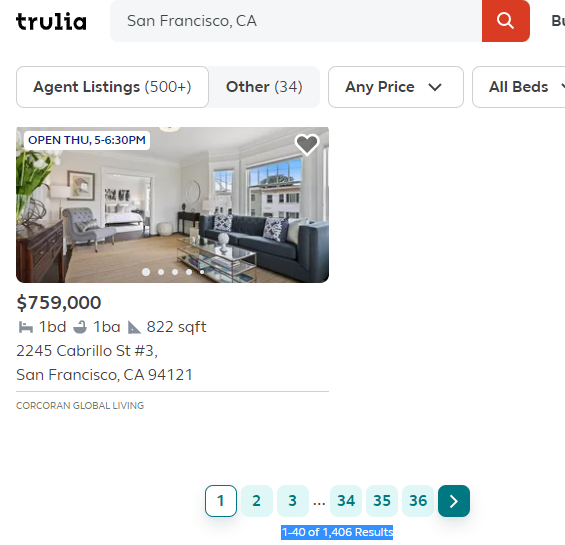

In [45]:
len(result)  #but if you see above figure there  should be 40

42

In [50]:
final_result=[res for res in result if res.has_attr('data-testid')]  # so we set has attribute to data-testid
len(final_result)

40

In [65]:
address=final_result[0].find('div',{'data-testid':'property-address'}).text
address

'1125 Vicente St, San Francisco, CA 94116'

In [66]:
beds=final_result[0].find('div',{'data-testid':'property-beds'}).text
beds

'3bd'

In [67]:
baths=final_result[0].find('div',{'data-testid':'property-baths'}).text
baths

'2ba'

In [68]:
area=final_result[0].find('div',{'data-testid':'property-floorSpace'}).text
area

'2,018 sqft'

In [69]:
price=final_result[0].find('div',{'data-testid':'property-price'}).text
price

'$998,000'

In [73]:
price=[result.find('div',{'data-testid':'property-price'}).text for result in final_result]
price

['$998,000',
 '$998,000',
 '$995,000',
 '$895,000',
 '$1,195,000',
 '$1,195,000',
 '$1,150,000',
 '$15,950,000',
 '$725,000',
 '$14,200,000',
 '$4,995,000',
 '$899,000',
 '$1,700,000',
 '$995,000',
 '$354,457',
 '$1,595,000',
 '$1,788,000',
 '$46,000,000',
 '$6,800,000',
 '$1,245,000',
 '$12,900,000',
 '$999,888',
 '$2,095,000',
 '$3,900,000',
 '$585,000',
 '$798,000',
 '$1,995,000',
 '$3,095,000',
 '$875,000',
 '$1,675,000',
 '$699,000',
 '$2,750,000',
 '$995,000',
 '$3,395,000',
 '$1,775,000',
 '$795,000',
 '$550,000',
 '$1,298,000',
 '$1,395,000',
 '$759,000']

In [74]:
len(price)

40

In [77]:
for item in range(len(final_result)):
   
        address=final_result[item].find('div',{'data-testid':'property-address'}).text
        print(address)
        beds=final_result[item].find('div',{'data-testid':'property-beds'}).text
        print(beds)
        baths=final_result[item].find('div',{'data-testid':'property-baths'}).text
        print(baths)
        try:
            area=final_result[item].find('div',{'data-testid':'property-floorSpace'}).text
            print(area)
        except:
            pass
        price=final_result[item].find('div',{'data-testid':'property-price'}).text
        print(price)
   
        print('*'*120)

1125 Vicente St, San Francisco, CA 94116
3bd
2ba
2,018 sqft
$998,000
************************************************************************************************************************
214 Putnam St, San Francisco, CA 94110
3bd
4ba
2,255 sqft
$998,000
************************************************************************************************************************
2026 47th Ave, San Francisco, CA 94116
3bd
2ba
1,224 sqft
$995,000
************************************************************************************************************************
134-136 Hartford St, San Francisco, CA 94114
2bd
2ba
2,000 sqft
$895,000
************************************************************************************************************************
1350 27th Ave, San Francisco, CA 94122
3bd
2ba
2,198 sqft
$1,195,000
************************************************************************************************************************
1226 44th Ave, San Francisco, CA 94122
4bd
3ba
1,9

In [85]:
beds=[result.find('div',{'data-testid':'property-beds'}).text for result in final_result]
beds

['3bd',
 '3bd',
 '3bd',
 '2bd',
 '3bd',
 '4bd',
 '2bd',
 '5bd',
 '2bd',
 '6bd',
 '5bd',
 '2bd',
 '2bd',
 '2bd',
 '2bd',
 '4bd',
 '5bd',
 '6bd',
 '4bd',
 '2bd',
 '5bd',
 '4bd',
 '3bd',
 '4bd',
 '1bd',
 '2bd',
 '4bd',
 '4bd',
 '3bd',
 '3bd',
 '2bd',
 '3bd',
 '3bd',
 '4bd',
 '4bd',
 '3bd',
 '1bd',
 '3bd',
 '2bd',
 '1bd']

In [86]:
bath=[result.find('div',{'data-testid':'property-baths'}).text for result in final_result]
bath

['2ba',
 '4ba',
 '2ba',
 '2ba',
 '2ba',
 '3ba',
 '2ba',
 '6ba',
 '1ba',
 '9ba',
 '6ba',
 '1ba',
 '2ba',
 '1ba',
 '2ba',
 '3ba',
 '5ba',
 '9ba',
 '4ba',
 '2ba',
 '8ba',
 '2ba',
 '4ba',
 '4ba',
 '1ba',
 '1ba',
 '4ba',
 '4ba',
 '2ba',
 '2ba',
 '2ba',
 '4ba',
 '2ba',
 '4ba',
 '3ba',
 '2ba',
 '1ba',
 '3ba',
 '2ba',
 '1ba']

In [93]:
area1=[]
# since few area is missing 
for item in range(len(final_result)):
    
    try:
        area=final_result[item].find('div',{'data-testid':'property-floorSpace'}).text
        area1.append(area)
    except:
        area1.append(' ')
        
       
   
        

In [95]:
area1

['2,018 sqft',
 '2,255 sqft',
 '1,224 sqft',
 '2,000 sqft',
 '2,198 sqft',
 '1,915 sqft',
 '1,546 sqft',
 '5,930 sqft',
 '940 sqft',
 '7,675 sqft',
 '4,270 sqft',
 ' ',
 '1,859 sqft',
 ' ',
 '832 sqft',
 '1,829 sqft',
 '2,595 sqft',
 '12,200 sqft',
 '3,800 sqft',
 '1,330 sqft',
 '6,385 sqft',
 '1,619 sqft',
 '2,477 sqft',
 '3,405 sqft',
 ' ',
 '845 sqft',
 '2,940 sqft',
 '2,950 sqft',
 '1,350 sqft',
 '1,293 sqft',
 '1,019 sqft',
 '2,345 sqft',
 '1,294 sqft',
 '3,770 sqft',
 '1,660 sqft',
 '896 sqft',
 ' ',
 '2,421 sqft',
 '1,515 sqft',
 '822 sqft']

In [99]:
address=[result.find('div',{'data-testid':'property-address'}).text for result in final_result]
address

['1125 Vicente St, San Francisco, CA 94116',
 '214 Putnam St, San Francisco, CA 94110',
 '2026 47th Ave, San Francisco, CA 94116',
 '134-136 Hartford St, San Francisco, CA 94114',
 '1350 27th Ave, San Francisco, CA 94122',
 '1226 44th Ave, San Francisco, CA 94122',
 '70 Rockridge Dr, San Francisco, CA 94116',
 '160 Sea Cliff Ave, San Francisco, CA 94121',
 '759 Grove St #759, San Francisco, CA 94102',
 '3080 Pacific Ave, San Francisco, CA 94115',
 '459 Ashbury St, San Francisco, CA 94117',
 '89 Vienna St, San Francisco, CA 94112',
 '1721 Baker St, San Francisco, CA 94115',
 '3846 23rd St, San Francisco, CA 94114',
 '338 Potrero Ave #304, San Francisco, CA 94103',
 '68 Glenview Dr, San Francisco, CA 94131',
 '1054 Plymouth Ave, San Francisco, CA 94112',
 '2582 Filbert St, San Francisco, CA 94123',
 '1446 Francisco St, San Francisco, CA 94123',
 '874 Shotwell St, San Francisco, CA 94110',
 '3498 Jackson St, San Francisco, CA 94118',
 '161 Miramar Ave, San Francisco, CA 94112',
 '65 Homes

In [100]:
pd.DataFrame({'area':area1,'Bath':baths,'Bed':beds,'Bath':baths,'Location':address,'Price':price})

,area,Bath,Bed,Location,Price
0,"2,018 sqft",1ba,3bd,"1125 Vicente St, San Francisco, CA 94116","$759,000"
1,"2,255 sqft",1ba,3bd,"214 Putnam St, San Francisco, CA 94110","$759,000"
2,"1,224 sqft",1ba,3bd,"2026 47th Ave, San Francisco, CA 94116","$759,000"
3,"2,000 sqft",1ba,2bd,"134-136 Hartford St, San Francisco, CA 94114","$759,000"
4,"2,198 sqft",1ba,3bd,"1350 27th Ave, San Francisco, CA 94122","$759,000"
5,"1,915 sqft",1ba,4bd,"1226 44th Ave, San Francisco, CA 94122","$759,000"
6,"1,546 sqft",1ba,2bd,"70 Rockridge Dr, San Francisco, CA 94116","$759,000"
7,"5,930 sqft",1ba,5bd,"160 Sea Cliff Ave, San Francisco, CA 94121","$759,000"
8,940 sqft,1ba,2bd,"759 Grove St #759, San Francisco, CA 94102","$759,000"
9,"7,675 sqft",1ba,6bd,"3080 Pacific Ave, San Francisco, CA 94115","$759,000"


# scarping multiple pages

In [101]:
website='https://www.trulia.com/NY/New_York'
response=requests.get(website)

In [102]:
response.status_code

200

In [112]:
for i in range(10):
    website='https://www.trulia.com/NY/New_York'+ str(i)+'_p'
    print(website)

https://www.trulia.com/NY/New_York0_p
https://www.trulia.com/NY/New_York1_p
https://www.trulia.com/NY/New_York2_p
https://www.trulia.com/NY/New_York3_p
https://www.trulia.com/NY/New_York4_p
https://www.trulia.com/NY/New_York5_p
https://www.trulia.com/NY/New_York6_p
https://www.trulia.com/NY/New_York7_p
https://www.trulia.com/NY/New_York8_p
https://www.trulia.com/NY/New_York9_p


In [122]:
df=pd.DataFrame(columns=['Price','Bath','Address','Beds','Area'])
for i in range(10):  # scraping first 10 pages
    website='https://www.trulia.com/NY/New_York'+ str(i)+ '_p'
    soup=BeautifulSoup(response.content,'html.parser')
    result=soup.find_all('li',class_='SearchResultsList__WideCell-b7y9ki-2')
    final_result=[res for res in result if res.has_attr('data-testid')]
    price=[result.find('div',{'data-testid':'property-price'}).text for result in final_result]
    bath=[result.find('div',{'data-testid':'property-baths'}).text for result in final_result]
    address=[result.find('div',{'data-testid':'property-address'}).text for result in final_result]
    beds=[result.find('div',{'data-testid':'property-beds'}).text for result in final_result]
    area1=[]
    for item in range(len(final_result)):

        try:
            area=final_result[item].find('div',{'data-testid':'property-floorSpace'}).text
            area1.append(area)
        except:
            area1.append(' ')
    for k in range(len(bath)):
        df=df.append({'Price':price[k],'Bath':bath[k],'Address':address[k],'Beds':beds[k],'Area':area1[k]},ignore_index=True)
    #print(bath)
            
        


In [123]:
df

,Price,Bath,Address,Beds,Area
0,"$169,000,000",9ba,"432 Park Ave #PENTHOUSE, New York, NY 10022",6bd,"8,255 sqft"
1,"$329,000",3ba,"303 E 57th St #32B, New York, NY 10022",2bd,"1,800 sqft"
2,"$495,000",4ba,"303 E 57th St #37DE, New York, NY 10022",4bd,
3,"$119,000",1ba,"100 W 57th St #19M, New York, NY 10019",Studio,450 sqft
4,"$995,000",3ba,"26 Lortel Ave, Staten Island, NY 10314",4bd,"1,274 sqft"
...,...,...,...,...,...
395,"$1,800,000",2ba,"539 4th St #3L, Brooklyn, NY 11215",3bd,"1,722 sqft"
396,"$900,000",3ba,"1815 Newkirk Ave, Brooklyn, NY 11226",4bd,"3,034 sqft"
397,"$300,000",3ba,"10727 155th St, Jamaica, NY 11433",6bd,"3,120 sqft"
398,"$675,000",3ba,"105 Rugby Ave, Staten Island, NY 10301",3bd,"1,344 sqft"
